# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

# Functional iteration methods

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

Want to find root of nonlinear equation

$$f(x) = 0. $$

Class of *iterative* methods start from guess $x_0$, construct sequence

$$x_0, x_1, x_2, \dots, x_n$$

converging to $s$ such that $f(s) = 0$. Write in general form

$$x_{n+1} = g(x_n).$$

Key requirements for the method are

-   The sequence constructed by $g$ converges to a limit ($s$);

-   The limit constructed is a root of $f$.

## Functional iteration methods

Simplest methods: if limit of sequence exists, it must be fixed point of
$g$: $g(s) = s$.

Thus, if $s$ exists, we have that

$$s - g(s) = 0.$$

But we also want

$$f(s) = 0.$$

Therefore, *one possible* definition of the iterative map $g$ is

$$g(x) = x - f(x).$$

*Functional iteration* or *fixed point* methods use maps of this kind.

## Graphical and geometrical interpretations

-   Roots of $f$ are equivalent to points where $y = g(x)$ and $y = x$
    intersect.

-   The iteration process is given by the vertical / horizontal lines:
    given $x_n$, the next guess ($x_{n+1}$) is computed using $g$.

-   Just because a fixed point exists there is no guarantee that the
    iteration process will converge to it!

### Geometric interpretations

-   If $g$ does not intersect $y=x$, no fixed points (top left).

-   If range outside domain, sequence may not have a limit (top
    right).

-   If slope less than 1, function has a unique fixed point
    (bottom right).

Not all fixed points *stable* (top right, bottom left):
no numerical implementation would converge.

### Graphical examples

Let us try to find the root of

$$f(x) = x - \cos(x)$$

in the interval $[0, 1]$. The fixed point map is

$$
\begin{aligned}
        g(x) & = x - f(x) \\
        & = \cos(x),
\end{aligned}
$$

which obeys

1.  $g(I) \subseteq I$, and

2.  $|g'(x)| < 1$ within the interval.

The results of the iteration are

$$\begin{aligned}
        x_0 & = 0 &
        x_1 & = 1 \\
        x_2 & = 0.540302 &
        x_{10} & = 0.731404 \\
        x_{50} & = 0.739085 &
        x_{100} & = 0.739085.
\end{aligned}
$$

In [3]:
def fn_iteration(f, x0, n_iterations = 100):
    """Functional iteration"""
    def g(x): 
        return x - f(x)
    iters = np.zeros((n_iterations+1,))
    iters[0] = x0
    for n in range(n_iterations):
        iters[n+1] = g(iters[n])
    
    return iters

In [4]:
def f1(x):
    return x - np.cos(x)

result1 = fn_iteration(f1, 0.0)

for i in [0, 1, 2, 10, 50, 100]:
    print("Result after {} iterations is {:6f}".format(i, result1[i]))

Result after 0 iterations is 0.000000
Result after 1 iterations is 1.000000
Result after 2 iterations is 0.540302
Result after 10 iterations is 0.731404
Result after 50 iterations is 0.739085
Result after 100 iterations is 0.739085


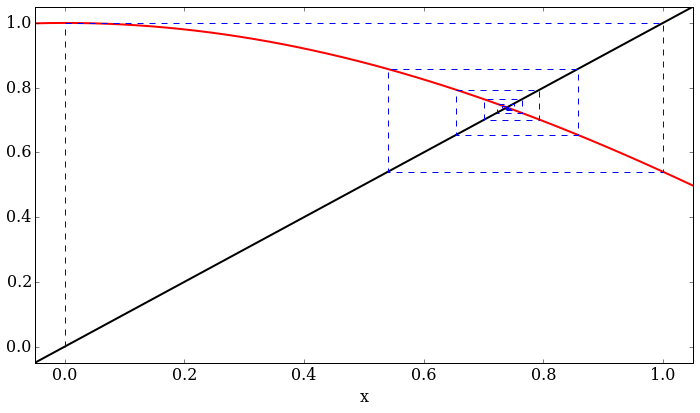

In [5]:
x = np.linspace(-0.1, 1.1)
g1x = x - f1(x)
plot_results = np.empty((2*result1.size,))
plot_results[0::2] = result1
plot_results[1::2] = result1 - f1(result1)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x, x, 'k-', linewidth = 2)
ax.plot(x, g1x, 'r-', linewidth = 2)
ax.plot(np.repeat(result1,2), plot_results, 'b--')
ax.set_xlabel('x')
ax.set_xbound(-0.05, 1.05)
ax.set_ybound(-0.05, 1.05)
fig.tight_layout()
plt.show()

## Graphical examples

Let us try to find the root of

$$f(x) = x^3 - 13 x + 18$$

in the interval $[1, 2.05]$. A map that works is

$$g(x)  = \frac{x^3 + 18}{13}$$

which equals $x$ at roots of $f$ (check!) and obeys

1.  $g(I) \subseteq I$, and

2.  $|g'(x)| < 1$ within the interval.

The results of the iteration are

$$\begin{aligned}
        x_0 & = 1 &
        x_1 & = 1.461538 \\
        x_2 & = 1.624768 &
        x_{10} & = 1.911737 \\
        x_{50} & = 1.997695 &
        x_{100} & = 1.999958.
      \end{aligned}$$

In [6]:
def f2(x):
    return -(x**3 - 13.0*x + 18.0) / 13.0

result2 = fn_iteration(f2, 1.0)

for i in [0, 1, 2, 10, 50, 100]:
    print("Result after {} iterations is {:6f}".format(i, result2[i]))

Result after 0 iterations is 1.000000
Result after 1 iterations is 1.461538
Result after 2 iterations is 1.624768
Result after 10 iterations is 1.911737
Result after 50 iterations is 1.997695
Result after 100 iterations is 1.999958


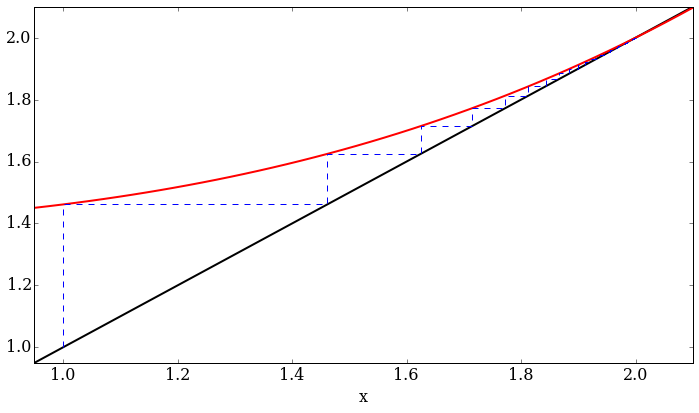

In [7]:
x = np.linspace(0.9, 2.1)
g2x = x - f2(x)
plot_results = np.empty((2*result2.size,))
plot_results[0::2] = result2
plot_results[1::2] = result2 - f2(result2)

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.plot(x, x, 'k-', linewidth = 2)
ax.plot(x, g2x, 'r-', linewidth = 2)
ax.plot(np.repeat(result2,2), plot_results, 'b--')
ax.set_xlabel('x')
ax.set_xbound(0.95, 2.1)
ax.set_ybound(0.95, 2.1)
fig.tight_layout()
plt.show()

## Contraction maps and theoretical results

### From intuition to theory

Geometric intuition gives: a continuous iterative map, with the range
within the domain, and slope less than 1, will have a unique fixed
point. To prove this need:

**Definition**: A *contracting map* is a continuous map
$g(x) : [a, b] = I \subseteq \mathbb{R} \rightarrow \mathbb{R}$ if

1.  $g(I) \subseteq I \Leftrightarrow g(x) \in I \, \, \, \forall
        x \in I$;

2.  $g(x)$ is *Lipschitz* continuous with constant $L < 1$:

    $$| g(x) - g(y) | \leq L | x - y | \, \, \, \forall x, y \in I.$$

It is key that

$$\left| \frac{ \textrm{d} g}{\textrm{d} x} \right| \leq L.$$

### Existence

First theorem shows that a fixed point of a contracting map exists:

**Theorem 1**: If the function $g(x)$ is continuous in $I = [a,
  b]$ and $g(I) \subseteq I$, then $g(x)$ has at least one fixed point
in $I$.

Theorem is stronger than we need; no need of Lipschitz continuity.

Proof: look for fixed points of $g$ in exactly the way that we look for
roots of $f$. Construct function $F(x) =  g(x) - x$, changes sign within $I$, and use continuity. Intermediate
value theorem shows there is a point $s$ where $F$ vanishes, implying
$g(s) = s$ and a fixed point.

### Uniqueness

**Contraction mapping theorem**: If $g(x)$ is a contraction mapping in $I$ then there exists one and
only one fixed point in $I$.

The notes contain a proof of a weaker version of this theorem that
requires differentiability. If $g$ is differentiable then the Mean Value
theorem can be used.

### Speed of convergence

A fixed point may exist, but how fast will the iterative method find it?

**Theorem**: If $g(x)$ is a contracting map in $I$ then, for arbitrary $x_0 \in I$
the sequence $x_{n+1} = g(x_n)$ converges to the unique fixed point $s$
and the error $e_n = x_n - s$ obeys

$$|e_n| \leq \frac{L^n}{1 - L} |x_1 - x_0|.$$

Proof: bound error in terms of previous error, then bound initial error
by first step. Bound on error and $L < 1$ gives convergence.

Theorem shows convergence depends strongly on $L$, hence magnitude of
derivative. Smaller derivative gives faster convergence.

### Examples revisited

We looked at

$$g(x) = \cos(x)$$

in the interval $[0, 1]$. It is a contracting map, but

$$\begin{aligned}
            \max_{x \in I} |g'(x)| & = \sin(1) \\
            & = 0.84147.
          \end{aligned}$$

We should not expect fast convergence.

The results of the iteration are

$$\begin{aligned}
            x_0 & = 0 &
            x_1 & = 1 \\
            x_2 & = 0.540302 &
            x_{10} & = 0.731404 \\
            x_{50} & = 0.739085 &
            x_{100} & = 0.739085.
          \end{aligned}$$

We looked at

$$g(x)  = \frac{x^3 + 18}{13}$$

in the interval $[1, 2.05]$. The map is monotonic and the largest value
of the derivative is

$$|g'(2.05)| = 0.97!$$

We therefore expect very slow convergence.

The results of the iteration are

$$\begin{aligned}
        x_0 & = 1 &
        x_1 & = 1.461538 \\
        x_2 & = 1.624768 &
        x_{10} & = 1.911737 \\
        x_{50} & = 1.997695 &
        x_{100} & = 1.999958.
      \end{aligned}$$

## Summary


-   Fixed point or functional iteration methods for finding the root of
    $f(x)$ look for fixed points of

    $$g(x) = x - f(x).$$

-   Typically, the faster the scheme converges the closer the initial
    guess needs to be.

-   Existence and uniqueness of the root found can be proved if $g$ is a
    contraction mapping for which

    1.  $g(I) \subseteq I$

    2.  $g$ is Lipschitz continuous with $L < 1$.

-   The speed of convergence is related to $L$ - the smaller $L$, the
    faster the convergence.

-   **All the results refer to the map $g$, not the original function
    $f$. $g$ can be chosen freely, provided the fixed point is a root of
    $f$!**
